In [1]:
# import stuff
import numpy as np
from matplotlib import pyplot as plt
import scipy as sp
from behavior_analysis import process_data as pd
import behavior_analysis as bd
from glob import glob
import os


%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
cageNum = "4058541."
home = "/Volumes/mplitt/VR/2AFC_V3/"
home = "Y:/VR/2AFC_V3/"

mice = ['.1','.2','.3','.4']



['Y:/VR/2AFC_V3/4058541.1\\OneSidedCues_noservo_10__Licks.txt', 'Y:/VR/2AFC_V3/4058541.1\\OneSidedCues_noservo_7__Licks.txt', 'Y:/VR/2AFC_V3/4058541.1\\OneSidedCues_noservo_9__Licks.txt', 'Y:/VR/2AFC_V3/4058541.1\\OneSidedCues_noservo_2__Licks.txt', 'Y:/VR/2AFC_V3/4058541.1\\OneSidedCues_noservo_12__Licks.txt', 'Y:/VR/2AFC_V3/4058541.1\\OneSidedCues_noservo_5__Licks.txt', 'Y:/VR/2AFC_V3/4058541.1\\OneSidedCues_noservo_4__Licks.txt', 'Y:/VR/2AFC_V3/4058541.1\\OneSidedCues_noservo_9_1__Licks.txt', 'Y:/VR/2AFC_V3/4058541.1\\OneSidedCues_noservo_8__Licks.txt', 'Y:/VR/2AFC_V3/4058541.1\\OneSidedCues_noservo_3__Licks.txt', 'Y:/VR/2AFC_V3/4058541.1\\OneSidedCues_noservo_6__Licks.txt', 'Y:/VR/2AFC_V3/4058541.1\\OneSidedCues_noservo_1__Licks.txt', 'Y:/VR/2AFC_V3/4058541.1\\OneSidedCues_noservo_2_1__Licks.txt', 'Y:/VR/2AFC_V3/4058541.1\\OneSidedCues_noservo_11__Licks.txt']


AttributeError: 'os.stat_result' object has no attribute 'st_birthtime'

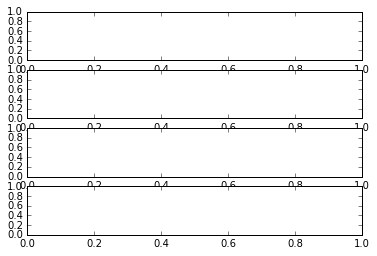

In [3]:
# Learning Curves
f, axarr = plt.subplots(4,1)
for i,mouse in mice:
    
    
    oneSidedFiles = glob(home+cageNum+mouse+"/OneSidedCues_noservo_*Licks.txt")
    halfOneSidedFiles = glob(home+cageNum+mouse+"/HalfOneSidedCue_noservo_*Licks.txt")
    AFCTrainFiles = glob(home+cageNum+mouse+"/2AFC_Train_noservo_*Licks.txt")
    allFiles = [i for i in oneSidedFiles]
    print(allFiles)
    allFiles.extend(halfOneSidedFiles)
    allFiles.extend(AFCTrainFiles)
    
    fileBDays = [os.stat(path_to_file).st_birthtime for path_to_file in allFiles]
    sortedFiles = [x for _, x in sorted(zip(fileBDays,allFiles), key=lambda pair: pair[0])]
    sortedSessions = [i.split(home+cageNum+mouse+"/")[1].split("_Licks.txt")[0] for i in sortedFiles]
    c = pd(cageNum+mouse,sortedSessions,basedir='home')
    c.save_sessions()
    
    R,D = c.load_sessions()
    PR = bd.plot_learning_curve(R,title=mouse,toPlot=False)
    axarr[i].plot(PR[:,0],'k',PR[:,1],'r')
    if i == 0:
        plt.legend(['context 1','context 2'])
        axarr[0].set_ylabel('P(lick port2)')
        axarr[0].set_xlabel('session')
    
    axarr[0].axvline(len(oneSidedFiles)-1)
    axarr[0].axvline(len(oneSidedFiles)+len(halfOneSidedFiles)-1)
    
    

In [ ]:
# sliding window % correct  v trial


for mouse in mice:
    allFiles = glob(home+cageNum+mouse+"/2AFC_Test_noServo_*Licks.txt")
    fileBDays = [os.stat(path_to_file).st_birthtime for path_to_file in allFiles]
    sortedFiles = [x for _, x in sorted(zip(fileBDays,allFiles), key=lambda pair: pair[0])]
    sortedSessions = [i.split(home+cageNum+mouse+"/")[1].split("_Licks.txt")[0] for i in sortedFiles]
    print(sortedSessions)
    c = pd(cageNum+mouse,sortedSessions,basedir='home')
    c.save_sessions()
    
    R,D = c.load_sessions()
    for sess in R.sessions:
            lLick_smooth, rLick_smooth = bd.sliding_window_correct(R[sess])
    #Rall,Dall = c.concatenate_sessions()
    #print(Rall)
    #bd.psychometrics(Rall,title=mouse,plots=['psych','RT'])
    

In [ ]:
# psychometric curves (pr(lick right) v morph)

In [ ]:
# RT

    # RT v morph
    
    
    # RT corrrect v incorrect in binary morphs

In [ ]:
# running speed

    # 1st half of track
    
        # v morph
        
        # correct v incorrect
        
        
    # reward LED triggered 
        
        # v morph
        
        # correct v incorrect
        
